In [84]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from time import time
import calendar
from datetime import datetime
import error_matrix

In [85]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# For splitting dataset
from sklearn.cross_validation import ShuffleSplit, train_test_split

import sklearn.learning_curve as curves
from sklearn.learning_curve import validation_curve

# k-fold cross validation
from sklearn.cross_validation import KFold, cross_val_score

# Import sklearn models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [86]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
lasso = Lasso(alpha=0.1)
reg = Ridge(alpha = .5)
svr = SVR()
tree = DecisionTreeRegressor()
Forest = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
gbr = GradientBoostingRegressor()
lr = LinearRegression()

In [87]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [88]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [89]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [90]:
train_data["year"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
train_data["month"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[1])
train_data["day"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_data = train_data.drop('datetime', axis=1)

In [91]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [92]:
test_data["year"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
test_data["month"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[1])
test_data["day"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
test_data["hour"] = test_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_features = test_data.drop('datetime', axis=1)

In [93]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0,3,10,13,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0,0,1,1,2011,01,01,04


In [94]:
target = train_data['count']
features = train_data.drop(['casual','registered','count'], axis=1)

In [95]:
features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0,2011,01,01,04


In [109]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(features)
scaled_test_features = StandardScaler().fit_transform(test_features)
scaled_test_features

array([[-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.56463285, -1.67178498],
       [-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.56463285, -1.52710892],
       [-1.36852657, -0.17315012,  0.67684424, ..., -1.62284907,
        -1.56463285, -1.38243286],
       ..., 
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         1.72961507,  1.36641221],
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         1.72961507,  1.51108827],
       [-1.36852657, -0.17315012,  0.67684424, ...,  1.58489845,
         1.72961507,  1.65576433]])

In [110]:
test_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04


In [111]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size= 0.25,random_state=42)

In [112]:
def train_and_predict_model(model, model_name, X_train, X_test, y_train, y_test, selected_cols):
    t0 = time()
    model.fit(X_train, y_train)
    train_time = time() - t0
    
    t1 = time()
    pred = model.predict(X_test)
    predict_time = time() - t1
    
    score = r2_score(y_test, pred)
    
    root_mean_squared_log_error = rmsle(y_test, pred)
    
    root_mean_error_score = mean_squared_error(y_test, pred)
    
    print ("r2_score of {} is {}".format(model_name, score))
    print ("Root mean squared value of {} is {}".format(model_name, root_mean_error_score))
    print ("Root mean squared log error value of {} is {}".format(model_name, root_mean_squared_log_error))
    print ("cross_val_score of {} is {}".format(model_name, cross_val_score(model, features, target , cv = 10).mean()))
    
    print ("Time taken to train {} is {}".format(model_name, train_time))
    print ("Time taken to predict {} is {}".format(model_name, predict_time))
    return model

In [ ]:
total_features = list(features.columns)
model = train_and_predict_model(Forest, 'Forest', X_train, X_test, y_train, y_test, total_features)

In [ ]:
len(total_features)

In [106]:
pred = model.predict(test_features)

In [107]:
test_data['count'] = pred
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00,179.340000
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01,668.760000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02,147.640000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03,150.873333
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04,150.873333


In [71]:
df = test_data[['datetime', 'count']]
df.to_csv('submission.csv', index = False)
df.head()

,datetime,count
0,2011-01-20 00:00:00,11.173333
1,2011-01-20 01:00:00,6.313333
2,2011-01-20 02:00:00,6.033333
3,2011-01-20 03:00:00,3.973333
4,2011-01-20 04:00:00,2.933333


[(0.6031, 'hour'), (0.0836, 'year'), (0.0753, 'temp'), (0.0738, 'workingday'), (0.0445, 'month'), (0.0414, 'atemp'), (0.0317, 'humidity'), (0.015, 'weather'), (0.0119, 'day'), (0.0095, 'windspeed'), (0.0076, 'season'), (0.0025, 'holiday')]


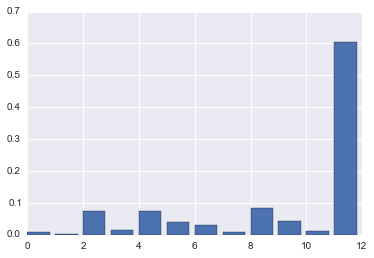

In [73]:
from matplotlib import pyplot
importance = Forest.feature_importances_
names = list(features)
pyplot.bar(range(len(importance)), importance)
print (sorted(zip(map(lambda x: round(x, 4), importance), names), 
             reverse=True))
pyplot.show()

In [74]:
selected_features = ['hour', 'year', 'workingday', 'temp', 'atemp', 'atemp']

In [75]:
train_and_predict_model(Forest, 'Random Forest', X_train, X_test, y_train, y_test, selected_features)

r2_score of Random Forest is 0.865043580343
Root mean squared value of Random Forest is 4420.23223908
Root mean squared log error value of Random Forest is 0.457203011044
cross_val_score of Random Forest is 0.569114123291
Time taken to train Random Forest is 3.10800004005
Time taken to predict Random Forest is 0.138999938965


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)